In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import time

# plt.style.use('seaborn-v0_8')
# sns.set_palette("Set1")

# 1 Task: Make_blobs = df1

Corr Matrix:
           feature1  feature2  feature3  feature4  feature5  feature6  \
feature1   1.000000  0.834480  0.840181  0.827620  0.830547  0.838154   
feature2   0.834480  1.000000  0.836994  0.838824  0.832449  0.835093   
feature3   0.840181  0.836994  1.000000  0.834373  0.830671  0.839740   
feature4   0.827620  0.838824  0.834373  1.000000  0.826313  0.834935   
feature5   0.830547  0.832449  0.830671  0.826313  1.000000  0.833253   
feature6   0.838154  0.835093  0.839740  0.834935  0.833253  1.000000   
feature7   0.837351  0.838898  0.837032  0.830264  0.829339  0.839486   
feature8   0.831426  0.832515  0.829960  0.836356  0.832418  0.837946   
feature9   0.836214  0.840540  0.832961  0.839547  0.833202  0.837039   
feature10  0.833757  0.834823  0.833852  0.837161  0.837627  0.836066   
feature11  0.832521  0.827379  0.829578  0.830365  0.830334  0.830560   
feature12  0.830835  0.832879  0.840366  0.831734  0.827914  0.835245   
feature13  0.830125  0.831446  0.83504

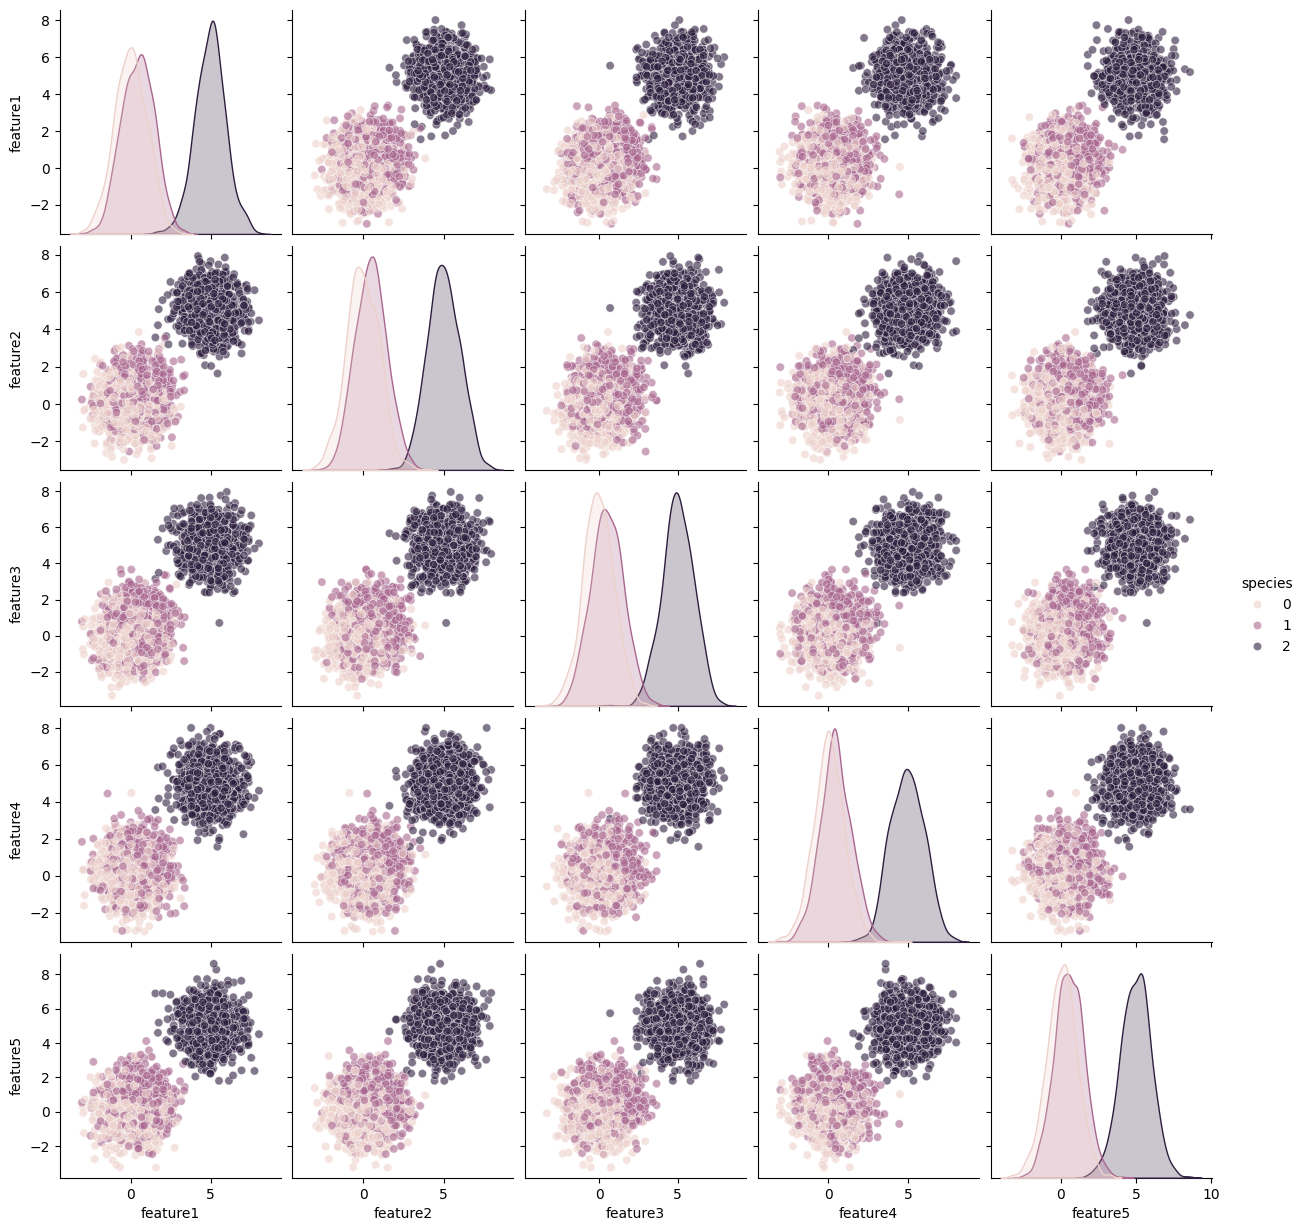

In [2]:
n_samples = 1000
n_features = 16
centers = np.array([
    np.zeros(n_features),
    np.ones(n_features) * 0.5,
    np.ones(n_features) * 5
])

x, y = make_blobs(
    n_samples=[n_samples, n_samples, n_samples],
    centers=centers,
    n_features=n_features,
    cluster_std=[1.0, 1.0, 1.0],
    random_state=42
)

feature_names = [f'feature{i+1}' for i in range(n_features)]
df1 = pd.DataFrame(x, columns=feature_names)
df1['species'] = y

corr_matrix = df1[feature_names].corr()
print('Corr Matrix:')
print(corr_matrix)

selected_features = feature_names[:5]

sns.pairplot(
    data=df1,
    vars=selected_features,
    hue='species',
    plot_kws={'alpha': 0.6},
    diag_kind='kde',
)

plt.show()



# 2 Task: Oversample DFs

In [ ]:
def oversample_class(df, target_class, repeat_list, class_col='species'):
    """
    Создает несколько датасетов, где целый класс повторяется разное количество раз.
    
    Parameters:
        df: исходный DataFrame
        target_class: класс, который нужно увеличивать
        repeat_list: список множителей (например [2,5,10,...])
        class_col: название колонки с классами
    Returns:
        dict: ключи - df2, df5,..., значения - новые DataFrame
    """
    dfs = {}
    
    # Разделяем на "увеличиваемый" и остальные
    df_target = df[df[class_col] == target_class]
    df_rest = df[df[class_col] != target_class]
    
    for r in repeat_list:
        df_new = pd.concat([df_target]*r + [df_rest], ignore_index=True)
        dfs[f'df{r}'] = df_new
    
    return dfs

repeat_list = [2, 5, 10, 20, 50, 100, 1000, 10000]
target_class = 0  # например, класс 0, который пересекается с другим
oversampled_datasets = oversample_class(df1, target_class, repeat_list)

# Проверка размеров
for name, df in oversampled_datasets.items():
    print(name, df.shape)

df2 (4000, 17)
df5 (7000, 17)
df10 (12000, 17)
df20 (22000, 17)
df50 (52000, 17)
df100 (102000, 17)
df1000 (1002000, 17)
df10000 (10002000, 17)


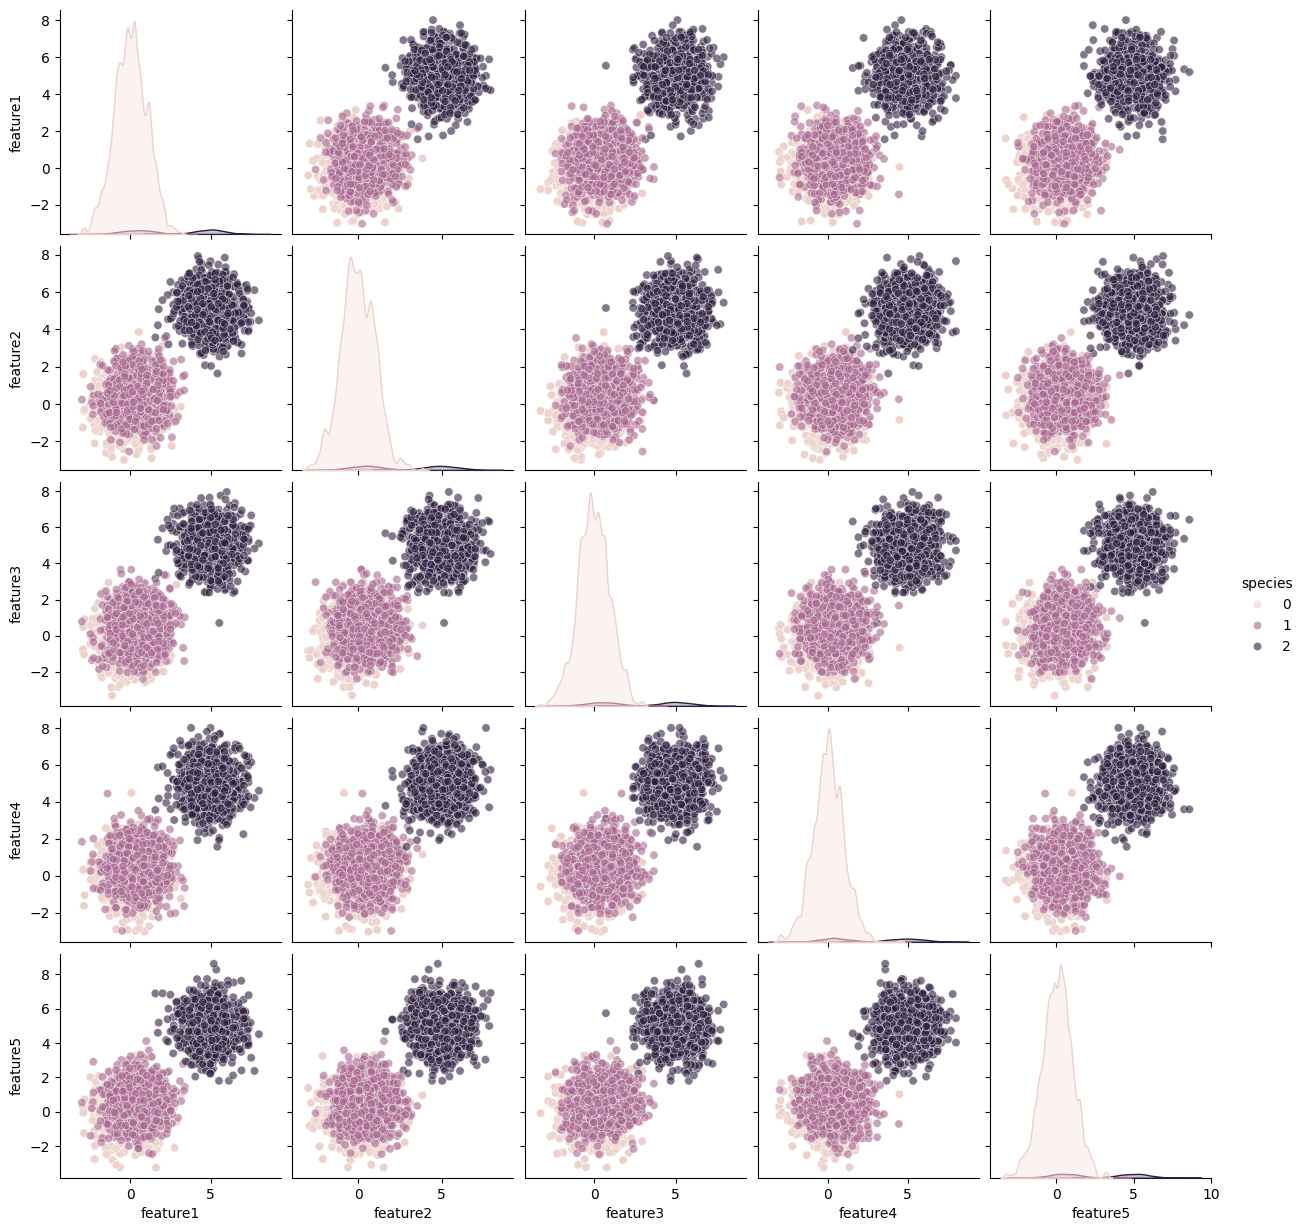

In [6]:
sns.pairplot(
    data=oversampled_datasets['df50'],
    vars=selected_features,
    hue='species',
    plot_kws={'alpha': 0.6},
    diag_kind='kde',
)

# 3 Task: LDA

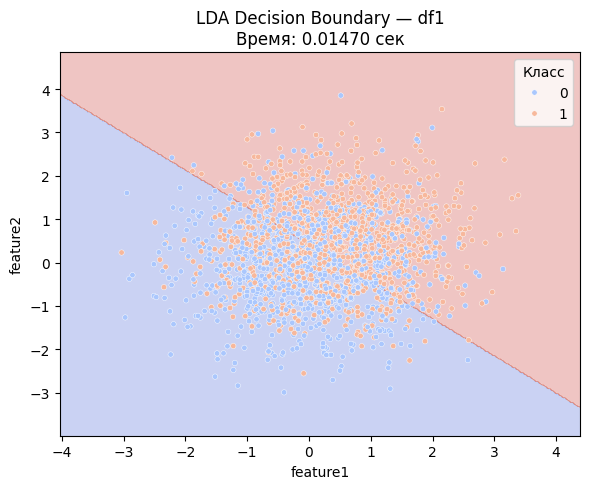

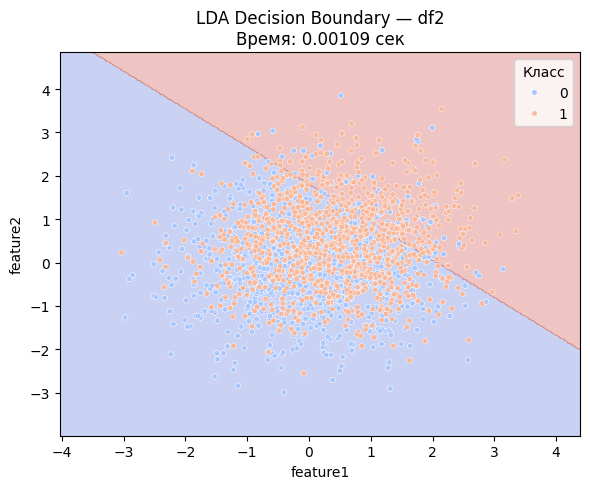

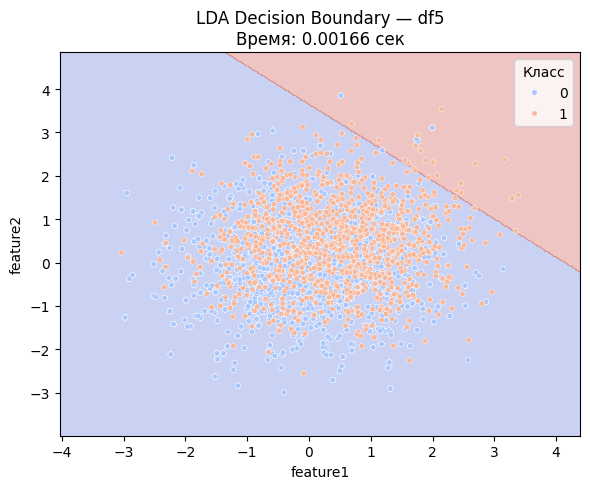

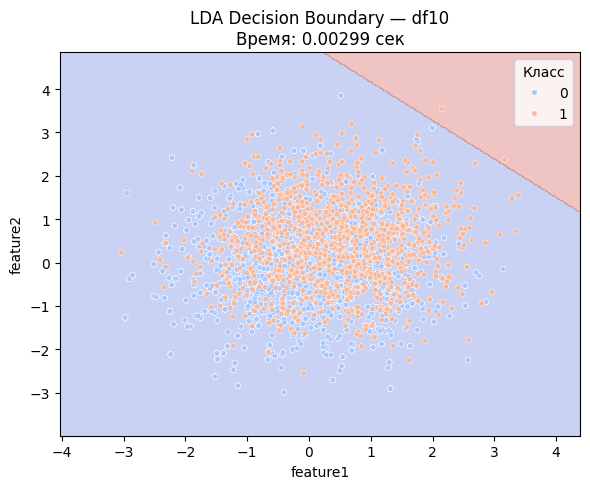

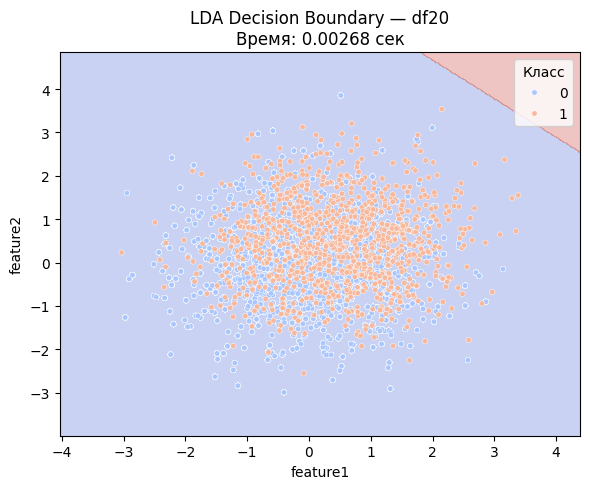

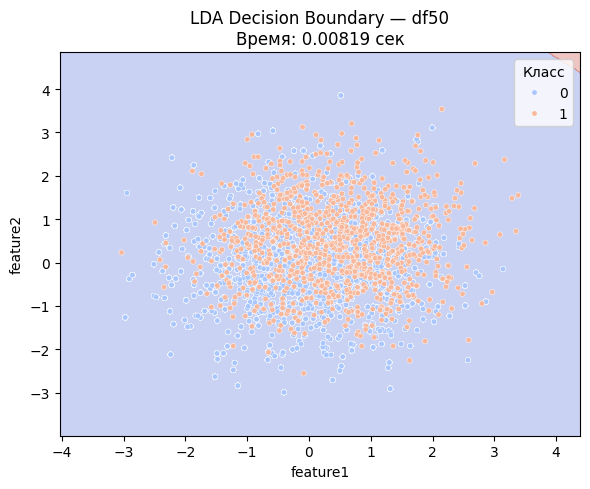

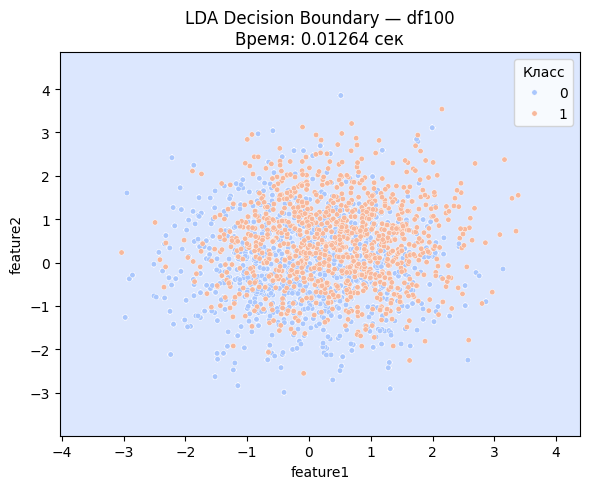

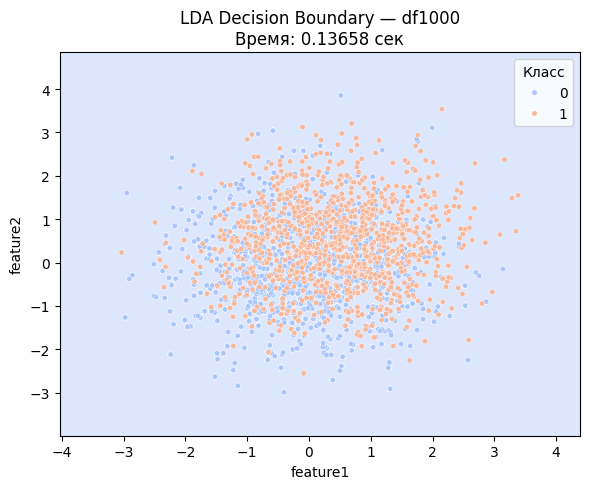

/tmp/ipykernel_2080/2563048914.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/toasty/repos/tsd/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [8]:
datasets = {'df1': df1}
datasets.update(oversampled_datasets)

selected_classes = [0, 1]
selected_features = ['feature1', 'feature2']

lda_times = {}

for name, df in datasets.items():
    df_sub = df[df['species'].isin(selected_classes)]
    X = df_sub[selected_features].values
    y = df_sub['species'].values

    start = time.time()
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    elapsed = time.time() - start
    lda_times[name] = elapsed

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
    
    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # === Визуализация ===
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', s=15)
    plt.title(f"LDA Decision Boundary — {name}\nВремя: {elapsed:.5f} сек")
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.legend(title='Класс')
    plt.tight_layout()
    plt.show()

print("\n⏱ Время построения LDA:")
for name, t in lda_times.items():
    print(f"{name:>6}: {t:.6f} сек")